In [ ]:
  import pandas as pd
import numpy as np

In [ ]:
path = '/content/TAIT.csv'
df = pd.read_csv(path)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1995-04-19,7.250,7.500,6.000,7.375,5.021836,364100
1,1995-04-20,7.625,8.500,6.625,7.750,5.277184,353700
2,1995-04-21,8.000,8.250,7.500,7.500,5.106952,179800
3,1995-04-24,7.500,8.250,7.000,7.500,5.106952,77300
4,1995-04-25,8.125,8.125,7.250,7.250,4.936720,101800


In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6283 entries, 0 to 6282
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6283 non-null   object 
 1   Open       6283 non-null   float64
 2   High       6283 non-null   float64
 3   Low        6283 non-null   float64
 4   Close      6283 non-null   float64
 5   Adj Close  6283 non-null   float64
 6   Volume     6283 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 343.7+ KB


In [ ]:
df.shape

(6283, 7)

In [ ]:
df.isnull().any().any() 

False

In [ ]:
df.isnull().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [ ]:
dc = df["Close"]

In [ ]:
dc.shape

(6283,)

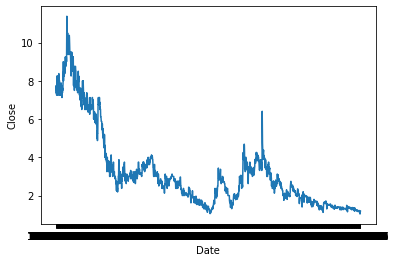

In [ ]:
import seaborn as sns
import  matplotlib.pyplot as plt
%matplotlib inline

sns.lineplot(x=df.Date[:2000],y=df.Close[:2000])

In [ ]:
dc.head(10)

0    7.375
1    7.750
2    7.500
3    7.500
4    7.250
5    7.875
6    8.250
7    8.250
8    8.250
9    7.500
Name: Close, dtype: float64

In [ ]:
def walk_forward(col, in_sample_len):
		train = []
		valid = []

		for i in range(len(col)-in_sample_len-1):
				z = col[i: (i + in_sample_len)]    

				train.append(z) # in_sample 4
				valid.append(col[i + in_sample_len]) # out of sample 1
		
		return np.array(train), np.array(valid)

In [ ]:
X, y =  walk_forward(dc, 4)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
x_train.shape

(5022, 4)

In [ ]:
x_train

array([[7.375     , 7.75      , 7.5       , 7.5       ],
       [7.75      , 7.5       , 7.5       , 7.25      ],
       [7.5       , 7.5       , 7.25      , 7.875     ],
       ...,
       [1.00999999, 1.        , 1.00999999, 1.        ],
       [1.        , 1.00999999, 1.        , 0.99000001],
       [1.00999999, 1.        , 0.99000001, 0.97000003]])

In [ ]:
y_train

array([7.25      , 7.875     , 8.25      , ..., 0.99000001, 0.97000003,
       0.97000003])

## Linear Regression

In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression
lr = sklearn.linear_model.LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(x_test)

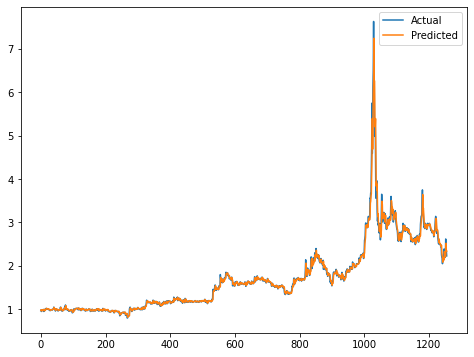

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
randomForestRegressor = RandomForestRegressor(max_depth=7, random_state=7)

In [ ]:
randomForestRegressor.fit(x_train,y_train)

RandomForestRegressor(max_depth=7, random_state=7)

In [ ]:
y_pred = randomForestRegressor.predict(x_test)

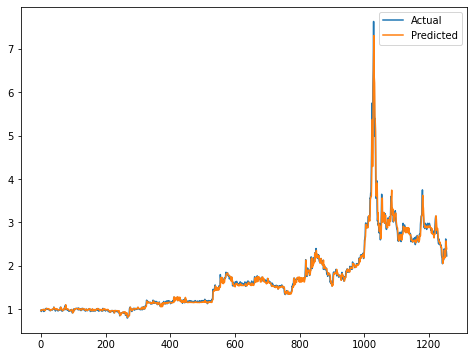

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

## **LSTM-DNN**

In [ ]:
# Define the LSTM model
model = Sequential()
model.add(layers.LSTM(50, input_shape = (4,1), return_sequences = True))
model.add(layers.Dropout(0.5))
model.add(layers.LSTM(256))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1))
model.add(layers.Activation("linear"))

model.compile(loss="mse", optimizer="adam")
model.summary()

In [ ]:
history = model.fit(x_train, y_train, epochs=27)

In [ ]:
y_pred = model.predict(x_test)
plt.figure(figsize=(8, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [ ]:
print(y_pred)
print(len(y_pred))
print(len(y_pred[0]))

## **1D-CNN-LSTM-DNN**

In [ ]:
import tensorflow as tf
tf.config.experimental_run_functions_eagerly(True)


model = Sequential()


model.add(layers.Conv1D(32, kernel_size=1, activation='relu', padding='same', input_shape=(1,1,4)))
model.add(layers.Conv1D(64, kernel_size=1, activation='relu', padding='same'))
model.add(layers.Dropout(0.2))


model.add(layers.Reshape((1,64)))


model.add(layers.LSTM(100,return_sequences=True))
model.add(layers.Dropout(0.5))
model.add(layers.LSTM(200))
model.add(layers.Dropout(0.5))


model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='linear'))
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])
model.summary()


Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1, 1, 32)          160       
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 1, 64)          2112      
                                                                 
 dropout_2 (Dropout)         (None, 1, 1, 64)          0         
                                                                 
 reshape (Reshape)           (None, 1, 64)             0         
                                                                 
 lstm_2 (LSTM)               (None, 1, 100)            66000     
                                                                 
 dropout_3 (Dropout)         (None, 1, 100)            0         
                  

In [ ]:
x_train_cnn = x_train.reshape(x_train.shape[0],1,1,x_train.shape[1])
x_test_cnn = x_test.reshape(x_test.shape[0],1,1,x_test.shape[1])

In [ ]:
history = model.fit(x_train_cnn,y_train,epochs=30)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


157/157 [==============================] - 13s 80ms/step - loss: 1.0216 - mse: 1.0216
Epoch 2/30
157/157 [==============================] - 20s 127ms/step - loss: 0.2325 - mse: 0.2325
Epoch 3/30
157/157 [==============================] - 16s 104ms/step - loss: 0.1521 - mse: 0.1521
Epoch 4/30
157/157 [==============================] - 14s 88ms/step - loss: 0.1562 - mse: 0.1562
Epoch 5/30
157/157 [==============================] - 13s 85ms/step - loss: 0.1333 - mse: 0.1333
Epoch 6/30
157/157 [==============================] - 8s 48ms/step - loss: 0.1192 - mse: 0.1192
Epoch 7/30
157/157 [==============================] - 8s 49ms/step - loss: 0.1283 - mse: 0.1283
Epoch 8/30
157/157 [==============================] - 8s 51ms/step - loss: 0.1205 - mse: 0.1205
Epoch 9/30
157/157 [==============================] - 8s 51ms/step - loss: 0.1206 - mse: 0.1206
Epoch 10/30
157/157 [==============================] - 8s 50ms/step - loss: 0.1187 - mse: 0.1187
Epoch 11/30
157/157 [======================

In [ ]:
y_pred = model.predict(x_test_cnn)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


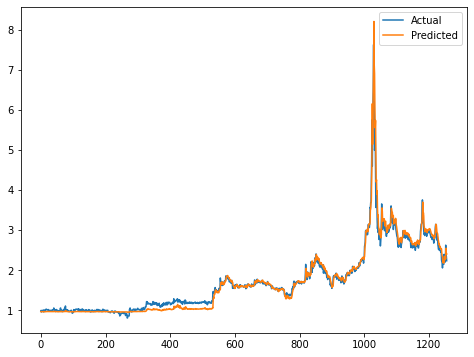

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

З отриманих вище графіків, можна зробити висновок, що на даному датасеті усі 3 моделі досить добре себе проявили. Однак на LSTM-DNN графіку видно просідання в кінці, де данні найбільше коливаються. У 1D-CNN-LSTM-DNN графіку невеликі просідання помітні на проміжку від 200 до 600, де помітна певна сталість даних.